<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%2010%20Gas-Condensate%20Reservoirs/notebook/10_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 10. Gas-Condensate Reservoirs**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1201 (delta 21), reused 0 (delta 0), pack-reused 1145
Receiving objects: 100% (1201/1201), 16.89 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (542/542), done.


In [2]:
import sys
sys.path.append('/content/reservoir-engineering/Unit 10 Gas-Condensate Reservoirs/functions')
from cvd_condensate import cvd_condensate

In [3]:
help(cvd_condensate)

Help on function cvd_condensate in module cvd_condensate:

cvd_condensate(z, z2, temp, p, Gp, Np, Vo)
    Calculate volatile oil-gas ratio of condensate from Constant-Volume Depletion (CVD) Study
    Walsh and Towler (1995)
    
    Inputs
    z: measured gas-phase compressibility factor (array)
    z2: measured two-phase compressibility factor (array)
    p: measured pressure (array)
    Gp: gas produced in the PVT cell, in Mscf
    Np: condensate produced in the PVT cell, in STB
    Vo: condensate volume in the PVT cell
    
    Outputs:
    Bo: in RB/STB
    Bg: in RB/scf
    Rs: in scf/STB
    Rv: in STB/scf



In [5]:
def condensate_belowdew(Rs, Rv, Rsi, Rvi, Bo, Bg, Np, Gp):
    """
    Calculate the parameters for material balance plot of gas-condensate reservoirs
    below dewpoint pressure

    Input:
    Rs: array
    Rv: array
    Rsi: initial Rs, float (NOTE: if data doesn't provide, calculate it with calculate_condensate_params function)
    Rvi: initial Rv, float (from data Rv)
    Bo: array
    Bg: array
    Np: array
    Gp: array

    Material balance plots:
    * Plot 10.1: F vs Eg

    Output:
    F: array
    Eg: array

    """
    Btg = ((Bg * (1 - (Rs * Rvi))) + (Bo * (Rvi - Rv))) / (1 - (Rv * Rs)) # in RB/STB
    Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs)) # in RB/scf

    Gi = 0
    F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + ((Gp - Gi) * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))
    Eg = Btg - Bg[0]
    return(F, Eg)

def condensate_abovedew(Bg, Bgi, Gp, Gpi):
    """
    Calculate the parameters for material balance plot of gas-condensate reservoirs
    above dewpoint pressure

    Input:
    Bg: array
    Bgi: initial Bg, float
    Gp: array
    Gpi: initial Gp, float

    Material balance plots:
    * Plot 10.1: F vs Eg

    Output:
    F: array
    Eg: array

    """
    Eg = Bg - Bgi
    F = Bg * (Gp - Gpi)
    return(F, Eg)

## Problem 10.1

Task 1. Determine OGIP and initial condensate in place

Task 2. Determine recovery at dewpoint

Task 3. Determine recovery at each pressure

Task 4. Calculate Bg, Bo, Rs, Rv

Note: Task 1 (calculate initial condensate in place) should be calculated after knowing the $R_{vi}$. So, I do Task 4 (calculate Rv) first to answer that.

In [4]:
# knowns

Bg = 0.6058 # gas FVF @ 5450 psia, RB/Mscf
area = 2200 # acre
h = 35 # ft
poro = 0.25
swi = 0.2
pi = 5800 # initial pressure, psia
zi = 1.065 # initial gas compressibility factor

# conversion
area = area * 43560 # convert acre to ft2
Bgi = Bg * (5.615 / 1E+03) # convert RB/Mscf to ft3/ft3

columns = ['j', 'p', 'T', 'Gp', 'Np', 'z', 'z2', 'Vo']
data = pd.read_csv('/content/reservoir-engineering/Unit 10 Gas-Condensate Reservoirs/data/Table 10.13-CVD Results for Problem 10.1.csv', names=columns)
data

,j,p,T,Gp,Np,z,z2,Vo
0,1,5450.0,215,0.00,0.00,1.0439,1.0439,0.0000
1,2,5300.0,215,11.51,1.82,1.0217,1.0269,0.0500
2,3,4800.0,215,61.64,7.53,0.9552,0.9779,0.1850
3,4,4300.0,215,119.02,12.64,0.9033,0.9311,0.2176
4,5,3800.0,215,190.70,17.31,0.8648,0.8927,0.2381
5,6,3300.0,215,272.80,21.28,0.8384,0.8590,0.2431
6,7,2800.0,215,366.85,24.57,0.8264,0.8320,0.2407
7,8,2300.0,215,469.94,27.15,0.8300,0.8093,0.2346
8,9,1800.0,215,579.24,29.22,0.8466,0.7868,0.2245
9,10,1300.0,215,690.53,30.89,0.8744,0.7531,0.2123


In [5]:
# Task 1. calculate OGIP and condensate in place by volumetrics

# calculate initial gas in place volumetrics
Gfgi_vol = (area * h * poro * (1 - swi)) / Bgi # result in scf
print('Original gas in place calculated by volumetrics:', Gfgi_vol / 1E+09, 'Bscf')

Original gas in place calculated by volumetrics: 197.21028573007675 Bscf


In [11]:
# Task 4. calculate Bg, Bo, Rs, Rv

z = data['z'].values
z2 = data['z2'].values
p = data['p'].values
Gp = data['Gp'].values
Np = data['Np'].values
Vo = data['Vo'].values
temp = data['T'].iloc[0]

# calculate Bo, Bg, Rs, Rv
Bo, Bg, Rs, Rv = cvd_condensate(z, z2, temp, p, Gp, Np, Vo) # result in STB/MMscf

# conversion
Bg = np.array(Bg) * 1E+3 # RB/scf to RB/Mscf
Rs = np.array(Rs) * 1E-3 # scf/STB to Mscf/STB
Rv = np.array(Rv) * 1E+6 # STB/scf to STB/MMscf

result = pd.DataFrame({'p (psia)': p[:-1], 'Bo (RB/STB)': Bo, 'Bg (RB/Mscf)': Bg,
                       'Rs (Mscf/STB)': Rs, 'Rv (STB/MMscf)': Rv})
result

/content/reservoir-engineering/Unit 10 Gas-Condensate Reservoirs/functions/cvd_condensate.py:132: RuntimeWarning: invalid value encountered in double_scalars
  Boj = Vtoj / Nfoj
/content/reservoir-engineering/Unit 10 Gas-Condensate Reservoirs/functions/cvd_condensate.py:140: RuntimeWarning: invalid value encountered in double_scalars
  Rsj = Gfoj / Nfoj


,p (psia),Bo (RB/STB),Bg (RB/Mscf),Rs (Mscf/STB),Rv (STB/MMscf)
0,5450.0,NaN,0.651205,NaN,165.500000
1,5300.0,2.315887,0.653802,3.006057,158.123371
2,4800.0,1.785745,0.667935,2.131139,113.903850
3,4300.0,1.611865,0.698619,1.725367,89.055420
4,3800.0,1.473220,0.752733,1.426785,65.150670
5,3300.0,1.369154,0.833501,1.174861,48.355664
6,2800.0,1.275349,0.959527,0.958751,34.981393
7,2300.0,1.197625,1.156391,0.776373,25.026676
8,1800.0,1.126269,1.477125,0.607631,18.938701
9,1300.0,1.056675,2.039332,0.442843,15.005841


In [9]:
Rv

[0.0001655,
 0.00015812337098175498,
 0.00011390384999002592,
 8.905542000697106e-05,
 6.515066964285711e-05,
 4.835566382460418e-05,
 3.49813928761297e-05,
 2.5026675720244428e-05,
 1.8938700823421774e-05,
 1.5005840596639426e-05,
 1.3507429085997297e-05]

In [14]:
# calculate initial condensate in place from ogip
condensate_inplace_vol = Gfgi_vol * (Rv[0] / 1E+6) # convert Rv from STB/MMscf to STB/scf

Gfgi_vol

print('Original condensate in place calculated by volumetrics:', condensate_inplace_vol / 1E+6, 'MMSTB')

Original condensate in place calculated by volumetrics: 32.63830228832771 MMSTB


## Problem 10.2

## Problem 10.3

Task 1. Calculate original gas and condensate in place by volumetrics.

Task 2. Compare the volumetrics result with material balance method.

In [75]:
# Task 1. calculate gas and condensate in place using volumetrics

# knowns
pi = 3691 # initial pressure, psia
Pd = 3691 # dewpoint pressure, psia
temp = 220 # fahrenheit
Rvi = 86.5 # initial volatile oil-gas ratio, STB/MMscf
Rsi = 11561 # initial solution gas-oil ratio, scf/STB
Bgi = 0.87 # initial gas FVF, RB/Mscf
swi = 0.3 # initial water saturation
poro = 0.1
area = 3100 # productive area, acre
h = 50 # average thickness, ft
min_k = 30 # minimum permeability of a range, mD
max_k = 40 # maximum permeability of a range, mD

# conversion
area = area * 43560 # convert acre to ft2
Bgi = Bgi * (5.615 / 1E+03) # convert RB/Mscf to ft3/ft3

columns = ['p', 'Np', 'Gp', 'Bg', 'Bo', 'Rs', 'Rv']
data = pd.read_csv('/content/reservoir-engineering/Unit 10 Gas-Condensate Reservoirs/data/Table 10.11-PVT and Production Data for Bacon-Lime Reservoir.csv', names=columns)
data = data[:14]

# add condition (below/above dew point) to the data
p = data['p'].values
status = []

for i in p:
  if i < Pd:
    _ = 'below dew'
  else:
    _ = 'above dew'
  status.append(_)

data['status'] = status

data

,p,Np,Gp,Bg,Bo,Rs,Rv,status
0,3700.0,0.0,0.00,0.87,10.058,11560.7,86.5,above dew
1,3650.0,28600.0,0.34,0.88,2.417,2378.0,81.5,below dew
2,3400.0,93000.0,1.20,0.92,2.192,2010.0,70.5,below dew
3,3100.0,231000.0,3.30,0.99,1.916,1569.0,56.2,below dew
4,2800.0,270000.0,4.30,1.08,1.736,1272.0,46.5,below dew
5,2500.0,379000.0,6.60,1.20,1.617,1067.0,39.5,below dew
6,2200.0,481000.0,9.10,1.35,1.504,873.0,33.8,below dew
7,1900.0,517200.0,10.50,1.56,1.416,719.0,29.9,below dew
8,1600.0,549000.0,12.00,1.85,1.326,565.0,27.3,below dew
9,1300.0,580000.0,12.80,2.28,1.268,461.0,25.5,below dew


In [58]:
# calculate initial gas in place volumetrics
Gfgi_vol = (area * h * poro * (1 - swi)) / Bgi # result in scf

# calculate initial condensate in place from ogip
condensate_inplace_vol = (Gfgi_vol / 1E+06) * Rvi # result in STB

print('Original gas in place calculated by volumetrics:', Gfgi_vol / 1E+09, 'Bscf')
print('Original condensate in place calculated by volumetrics:', condensate_inplace_vol / 1E+06, 'MMSTB')

Original gas in place calculated by volumetrics: 96.7494703227193 Bscf
Original condensate in place calculated by volumetrics: 8.368829182915219 MMSTB


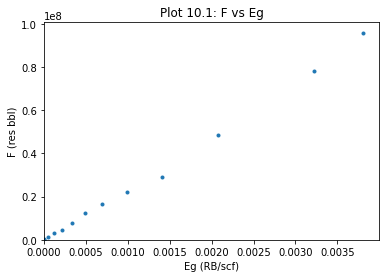

In [88]:
# calculate initial gas in place by material balance plot

# for above and below dewpoint, the calculation is different

above = data.iloc[0]
Bg = above['Bg'] / 1E+3 # RB/Mscf to RB/scf
Bgi = Bg
Gp = above['Gp'] * 1E+9 # Bscf to scf
Gpi = Gp
F_above, Eg_above = condensate_abovedew(Bg, Bgi, Gp, Gpi)

below = data.iloc[1:]
Rs = below['Rs'].values
Rv = below['Rv'].values / 1E+6  # STB/MMscf to STB/scf
Rsi = Rs[0]
Rvi = Rv[0]
Bo = below['Bo'].values
Bg = below['Bg'].values / 1E+3 # RB/Mscf to RB/scf
Np = below['Np'].values
Gp = below['Gp'].values * 1E+9 # Bscf to scf
F_below, Eg_below = condensate_belowdew(Rs, Rv, Rsi, Rvi, Bo, Bg, Np, Gp)

F = np.append(F_above, F_below)
Eg = np.append(Eg_above, Eg_below)

plt.plot(Eg, F, '.')
plt.title('Plot 10.1: F vs Eg')
plt.xlabel('Eg (RB/scf)'); plt.ylabel('F (res bbl)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.show()

Initial Gas in Place by Material Balance: 24.573469695040338 Bscf
Initial Condensate in Place by Material Balance: 2.0027377801457873 MMSTB


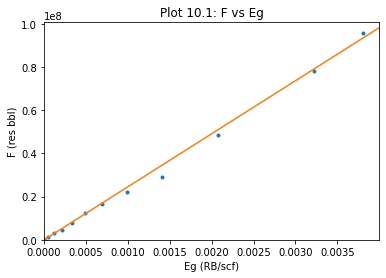

In [96]:
import sys
sys.path.append('/content/reservoir-engineering')
from utilities import *

plt.plot(Eg, F, '.')
plt.title('Plot 10.1: F vs Eg')
plt.xlabel('Eg (RB/scf)'); plt.ylabel('F (res bbl)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

b, a = simple_linear_regression_traditional(Eg[:-1], F[:-1])

y = a * Eg
print('Initial Gas in Place by Material Balance:', a / 1E+9, 'Bscf')

condensate_in_place = a * Rvi
print('Initial Condensate in Place by Material Balance:', condensate_in_place / 1E+06, 'MMSTB')

plt.plot(Eg, y)
plt.show()

There is an indication of aquifer influx because it curves upward